In [1]:
from src.preprocessing_modules import *
from src.dno_modules2 import *
import numpy as np
import matplotlib.pyplot as plt
import umap
import pymde
import torch
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

2022-11-17 23:19:02.391073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Set the random seed
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()

In [3]:
%load_ext autoreload
%autoreload 2

# GSE128639
PBMC CITE-seq with 25 antibodies describe in ADT

In [446]:
data_directory = 'Sample Datasets/GSE128639'
metadata, pro, rna, cite_data = load_data(data_directory)
GSE128639_obj = Rdata()

Reading Data in Sample Datasets/GSE128639/

Found protein, meta, rna data!


In [450]:
#### CITE-seq with Deep-N-Omics ####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSE128639_test','gene_pro', epochs=20, override = True)
GSE128639_GP = makeObj([rna, pro],bottleneck, metadata,"celltype.l2")
GSE128639_obj.gene_protein = GSE128639_GP
#### RNA-seq with AE ###############
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSE128639_test', 'gene_only',epochs=20)
GSE128639_GO = makeObj(rna, bottleneck, metadata, "celltype.l2")
GSE128639_obj.gene_only = GSE128639_GO
#### CITE-seq with PCA ###############
GSE128639_PCA = PCAobj(cite_data, metadata, "celltype.l2")
GSE128639_obj.cite_pca = GSE128639_PCA
#### Control ##########################
GSE128639_control = makeObj(cite_data, None, metadata,"celltype.l2")
GSE128639_obj.control = GSE128639_control

Epoch 1/20
959/959 [==============================] - 14s 12ms/step - loss: 1.5578 - gene_decoder_last_loss: 0.7160 - protein_decoder_last_loss: 0.8419 - val_loss: 1.3546 - val_gene_decoder_last_loss: 0.6785 - val_protein_decoder_last_loss: 0.6761
Epoch 2/20
959/959 [==============================] - 13s 14ms/step - loss: 1.3325 - gene_decoder_last_loss: 0.6768 - protein_decoder_last_loss: 0.6558 - val_loss: 1.2951 - val_gene_decoder_last_loss: 0.6725 - val_protein_decoder_last_loss: 0.6226
Epoch 3/20
959/959 [==============================] - 12s 13ms/step - loss: 1.2951 - gene_decoder_last_loss: 0.6720 - protein_decoder_last_loss: 0.6232 - val_loss: 1.2734 - val_gene_decoder_last_loss: 0.6684 - val_protein_decoder_last_loss: 0.6050
Epoch 4/20
959/959 [==============================] - 12s 13ms/step - loss: 1.2790 - gene_decoder_last_loss: 0.6686 - protein_decoder_last_loss: 0.6104 - val_loss: 1.2619 - val_gene_decoder_last_loss: 0.6659 - val_protein_decoder_last_loss: 0.5960
Epoch 5/

INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
959/959 [==============================] - 4s 3ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
959/959 [==============================] - 3s 3ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [452]:
dill.dump(GSE128639_obj, file = open("saved_datasetObjs/GSE128639.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://f4b9e6c7-14bc-41b3-80d0-f94db02dc19f/assets


INFO:tensorflow:Assets written to: ram://f4b9e6c7-14bc-41b3-80d0-f94db02dc19f/assets


INFO:tensorflow:Assets written to: ram://80d4e799-38c1-4750-8a77-6d8ca387427f/assets


INFO:tensorflow:Assets written to: ram://80d4e799-38c1-4750-8a77-6d8ca387427f/assets


#### Plot All

gene_protein 0.89273604590506
gene_only 0.7382303077725613
cite_pca 0.6828051643192489
control 0.2677034428794992


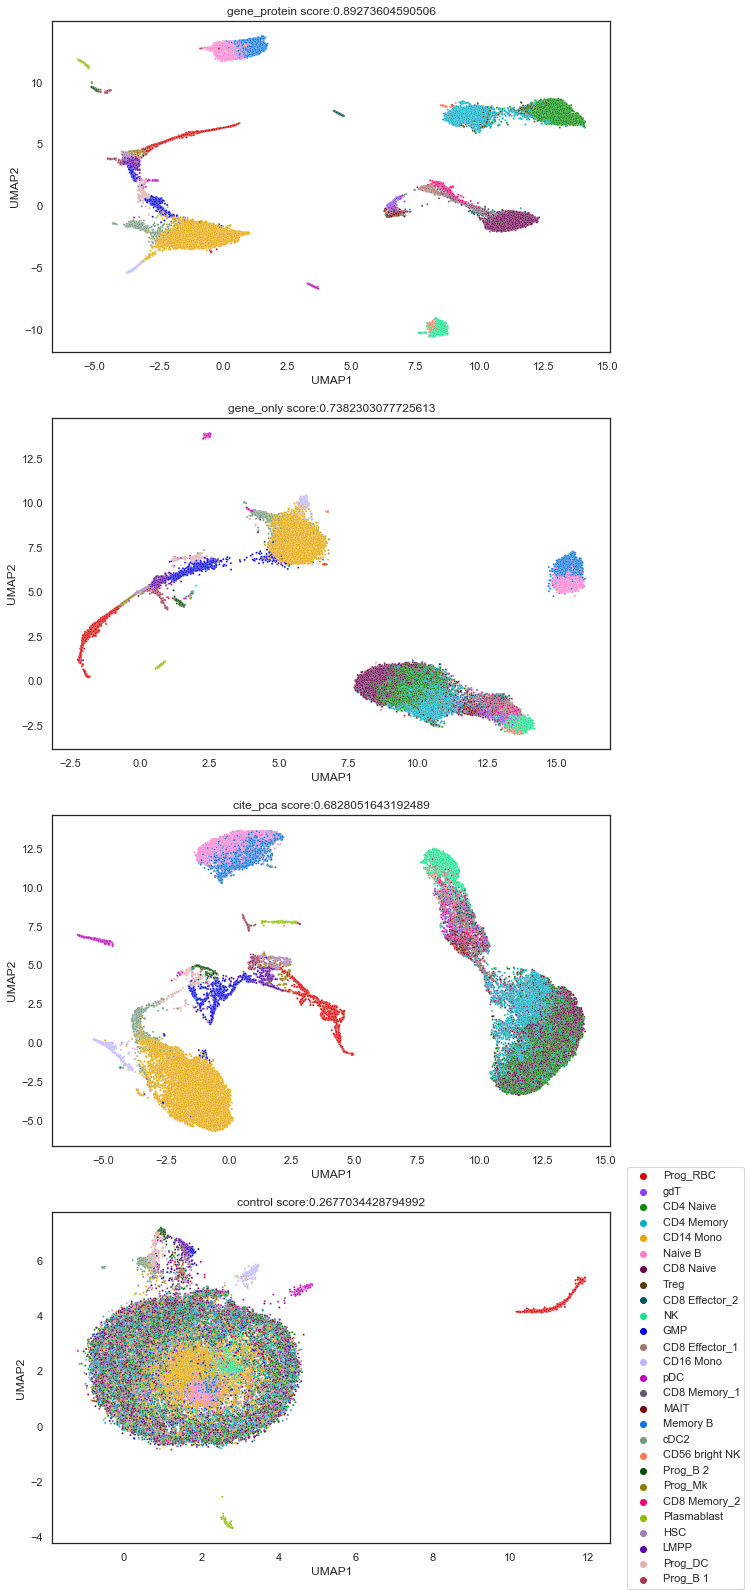

In [8]:
plotObjs(GSE128639_obj, metadata, "celltype.l2")

# GSE100866
CBMC CITE-seq with 13 antibodies describe in ADT.
We will use this as a example of manual data loading

In [358]:
# User specify dataset (each column is a gene/metadata feature and each row is a cell)
rna = pd.read_csv("Sample Datasets/GSE100866/rna_scale.csv.gz",index_col=0).T
pro = pd.read_csv("Sample Datasets/GSE100866/protein_scale.csv.gz", index_col=0).T
metadata = pd.read_csv("Sample Datasets/GSE100866/metadata.csv.gz",index_col=0)
metadata['cell_barcode'] = metadata.index # to preserve cell barcode

In [359]:
# remove multiplets 
multiplets = list(metadata[metadata.rna_annotations == "Multiplets"].index)
rna = rna[~rna.index.isin(multiplets)]
pro = pro[~pro.index.isin(multiplets)]
metadata = metadata[~metadata.index.isin(multiplets)]

In [360]:
cite_data = pd.concat([rna, pro], axis = 1)
GSE100866_obj = Rdata()

Epoch 1/20
247/247 [==============================] - 4s 11ms/step - loss: 0.7018 - val_loss: 0.6346
Epoch 2/20
247/247 [==============================] - 2s 9ms/step - loss: 0.6086 - val_loss: 0.5998
Epoch 3/20
247/247 [==============================] - 2s 9ms/step - loss: 0.5953 - val_loss: 0.5895
Epoch 4/20
247/247 [==============================] - 3s 11ms/step - loss: 0.5900 - val_loss: 0.5846
Epoch 5/20
247/247 [==============================] - 3s 12ms/step - loss: 0.5860 - val_loss: 0.5812
Epoch 6/20
247/247 [==============================] - 3s 13ms/step - loss: 0.5828 - val_loss: 0.5765
Epoch 7/20
247/247 [==============================] - 3s 11ms/step - loss: 0.5790 - val_loss: 0.5739
Epoch 8/20
247/247 [==============================] - 2s 10ms/step - loss: 0.5759 - val_loss: 0.5700
Epoch 9/20
247/247 [==============================] - 3s 11ms/step - loss: 0.5731 - val_loss: 0.5673
Epoch 10/20
247/247 [==============================] - 3s 11ms/step - loss: 0.5708 - val_loss

INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
247/247 [==============================] - 1s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anac

gene_protein 0.7967067764407854
gene_only 0.7963267891070298
cite_pca 0.8444585180493983
control 0.668777707409753


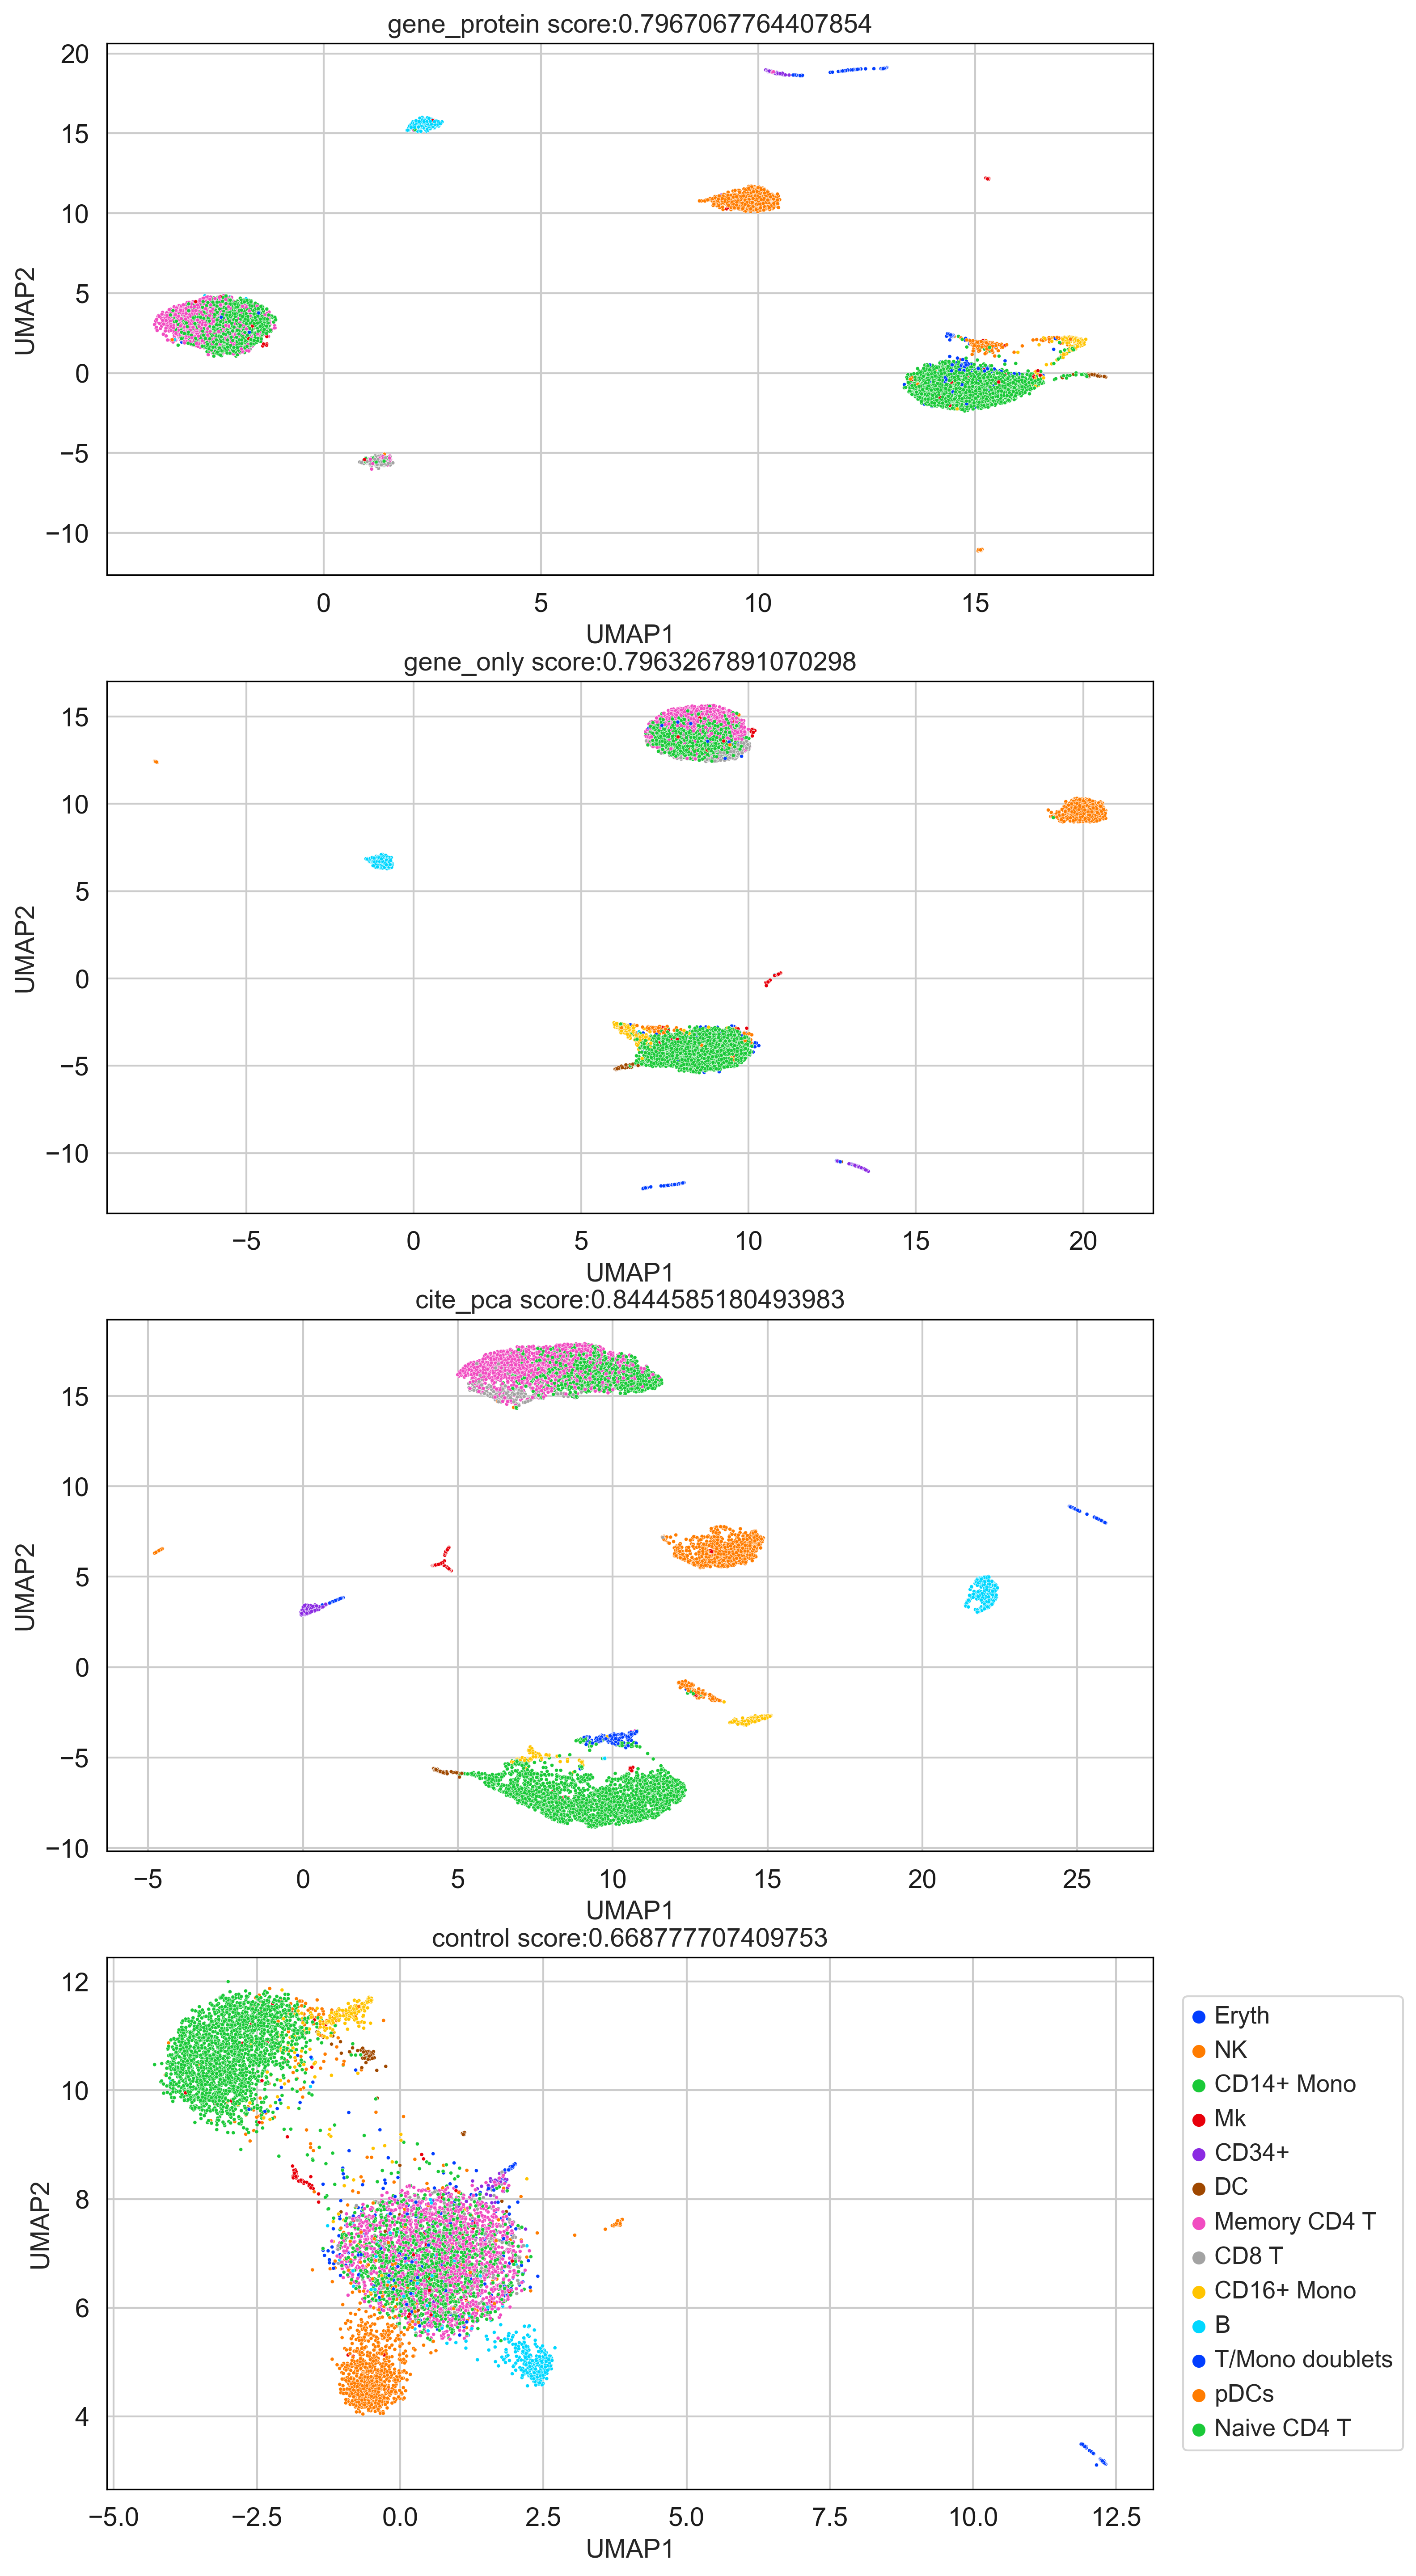

In [363]:
#### CITE-seq with Deep-N-Omics
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSE100866_test','gene_pro', epochs=20, override = True)
GSE100866_GP = makeObj([rna, pro],bottleneck, metadata,"rna_annotations")
GSE100866_obj.gene_protein = GSE100866_GP

#### RNA-seq with AE
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSE100866_test', 'gene_only',epochs=20, override = True)
GSE100866_GO = makeObj(rna, bottleneck, metadata, "rna_annotations")
GSE100866_obj.gene_only = GSE100866_GO

#### CITE-seq with PCA
GSE100866_PCA = PCAobj(cite_data, metadata, "rna_annotations")
GSE100866_obj.cite_pca = GSE100866_PCA

#### Control
GSE100866_control = makeObj(cite_data, None, metadata,"rna_annotations" )
GSE100866_obj.control = GSE100866_control

In [435]:
dill.dump(GSE100866_obj, file = open("saved_datasetObjs/GSE100866.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://9f7e54fe-9565-47e8-ba10-8c420da9e931/assets


INFO:tensorflow:Assets written to: ram://9f7e54fe-9565-47e8-ba10-8c420da9e931/assets


INFO:tensorflow:Assets written to: ram://9ad747f2-d27b-4ac6-97f6-e76dc7d8ca31/assets


INFO:tensorflow:Assets written to: ram://9ad747f2-d27b-4ac6-97f6-e76dc7d8ca31/assets


# GSE164378

In [11]:
data_directory = 'Sample Datasets/GSE164378'
metadata, pro, rna, cite_data = load_data(data_directory, transpose=False)
GSE164378_obj = Rdata()
colRef = "celltype.l2"

#### CITE-seq with AE #####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSE164378_test','gene_pro', epochs=20)
GSE164378_GP = makeObj([rna, pro],bottleneck, metadata,colRef)
GSE164378_obj.gene_protein = GSE164378_GP
#### RNA-seq with AE #####
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSE164378_test', 'gene_only',epochs=20)
GSE164378_GO = makeObj(rna, bottleneck, metadata, colRef)
GSE164378_obj.gene_only = GSE164378_GO
#### CITE-seq with PCA #####
GSE164378_PCA = PCAobj(cite_data, metadata, colRef)
GSE164378_obj.cite_pca = GSE164378_PCA
#### Control #####
GSE164378_control = makeObj(cite_data, None, metadata,colRef )
GSE164378_obj.control = GSE164378_control

Reading Data in Sample Datasets/GSE164378/

Found rna, protein, meta data!
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
910/910 [==============================] - 2s 2ms/step


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
910/910 [==============================] - 2s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [12]:
dill.dump(GSE164378_obj, file = open("saved_datasetObjs/GSE164378.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://d99dd5c2-8049-463d-a24d-74d7dc856087/assets


INFO:tensorflow:Assets written to: ram://d99dd5c2-8049-463d-a24d-74d7dc856087/assets


INFO:tensorflow:Assets written to: ram://6a7207ff-94f5-492a-8bb1-6f6058f49acf/assets


INFO:tensorflow:Assets written to: ram://6a7207ff-94f5-492a-8bb1-6f6058f49acf/assets


# GSE153056

In [377]:
data_directory = 'Sample Datasets/GSE153056'
metadata, pro, rna, cite_data = load_data(data_directory)
GSE153056_obj = Rdata()
colRef = "Phase"

#### CITE-seq with AE #####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSE153056_test','gene_pro', epochs=20, override = False)
GSE153056_GP = makeObj([rna, pro],bottleneck, metadata,colRef)
GSE153056_obj.gene_protein = GSE153056_GP
#### RNA-seq with AE #####
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSE153056_test', 'gene_only',epochs=20, override = False)
GSE153056_GO = makeObj(rna, bottleneck, metadata, colRef)
GSE153056_obj.gene_only = GSE153056_GO
#### CITE-seq with PCA #####
GSE153056_PCA = PCAobj(cite_data, metadata, colRef)
GSE153056_obj.cite_pca = GSE153056_PCA
#### Control #####
GSE153056_control = makeObj(cite_data, None, metadata,colRef )
GSE153056_obj.control = GSE153056_control

Reading Data in Sample Datasets/GSE153056/

Found protein, meta, rna data!
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
648/648 [==============================] - 2s 2ms/step
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
648/648 [==============================] - 2s 2ms/step


In [436]:
dill.dump(GSE153056_obj, file = open("saved_datasetObjs/GSE153056.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://3a35e217-1124-4854-b3da-290b81bcb23c/assets


INFO:tensorflow:Assets written to: ram://3a35e217-1124-4854-b3da-290b81bcb23c/assets


INFO:tensorflow:Assets written to: ram://e6543f60-bff6-4366-8322-f8a51df3c48e/assets


INFO:tensorflow:Assets written to: ram://e6543f60-bff6-4366-8322-f8a51df3c48e/assets


# GSE166489

In [379]:
### Severe
data_directory = 'Sample Datasets/GSE166489/MIS-C Severe/GSM5073055'
metadata, pro, rna, cite_data = load_data(data_directory)
GSM5073055_obj = Rdata()
colRef = 'predicted.celltype.l2'

#### CITE-seq with AE #####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSM5073055_test','gene_pro', epochs=20, override = True)
GSM5073055_GP = makeObj([rna, pro],bottleneck, metadata,colRef)
GSM5073055_obj.gene_protein = GSM5073055_GP
#### RNA-seq with AE #####
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSM5073055_test', 'gene_only',epochs=20, override = True)
GSM5073055_GO = makeObj(rna, bottleneck, metadata, colRef)
GSM5073055_obj.gene_only = GSM5073055_GO
#### CITE-seq with PCA #####
GSM5073055_PCA = PCAobj(cite_data, metadata, colRef)
GSM5073055_obj.cite_pca = GSM5073055_PCA
#### Control #####
GSM5073055_control = makeObj(cite_data, None, metadata,colRef )
GSM5073055_obj.control = GSM5073055_control

Reading Data in Sample Datasets/GSE166489/MIS-C Severe/GSM5073055/

Found protein, meta, rna data!
Epoch 1/20
293/293 [==============================] - 5s 13ms/step - loss: 1.7622 - gene_decoder_last_loss: 0.7393 - protein_decoder_last_loss: 1.0229 - val_loss: 1.6732 - val_gene_decoder_last_loss: 0.7248 - val_protein_decoder_last_loss: 0.9484
Epoch 2/20
293/293 [==============================] - 3s 11ms/step - loss: 1.5057 - gene_decoder_last_loss: 0.6538 - protein_decoder_last_loss: 0.8519 - val_loss: 1.4863 - val_gene_decoder_last_loss: 0.6501 - val_protein_decoder_last_loss: 0.8362
Epoch 3/20
293/293 [==============================] - 3s 12ms/step - loss: 1.4741 - gene_decoder_last_loss: 0.6482 - protein_decoder_last_loss: 0.8260 - val_loss: 1.4548 - val_gene_decoder_last_loss: 0.6421 - val_protein_decoder_last_loss: 0.8127
Epoch 4/20
293/293 [==============================] - 3s 12ms/step - loss: 1.4560 - gene_decoder_last_loss: 0.6441 - protein_decoder_last_loss: 0.8119 - val_los

INFO:tensorflow:Assets written to: saved_models/GSM5073055_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073055_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073055_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073055_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
293/293 [==============================] - 1s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Epoch 1/20
293/293 [==============================] - 5s 14ms/step - loss: 0.7395 - val_loss: 0.6929
Epoch 2/20
293/293 [==============================] - 3s 12ms/step - loss: 0.6543 - val_loss: 0.6469
Epoch 3/20
293/293 [==============================] - 4s 13ms/step - loss: 0.6463 - val_loss: 0.6402
Epoch 4/20
293/293 [==============================] - 4s 13ms/step - loss: 0.6397 - val_loss: 0.6321
Epoch 5/20
293/293 [==============================] - 4s 12ms/step - loss: 0.6346 - val_loss: 0.6267
Epoch 6/20
293/293 [==============================] - 4s 12ms/step - loss: 0.6300 - val_loss: 0.6229
Epoch 7/20
293/293 [==============================] - 4s 13ms/step - loss: 0.6260 - val_loss: 0.6209
Epoch 8/20
293/293 [==============================] - 4s 15ms/step - loss: 0.6221 - val_loss: 0.6155
Epoch 9/20
293/293 [==============================] - 4s 13ms/step - loss: 0.6188 - val_loss: 0.6133
Epoch 10/20
293/293 [==============================] - 4s 12ms/step - loss: 0.6160 - val_lo

INFO:tensorflow:Assets written to: saved_models/GSM5073055_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073055_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073055_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
293/293 [==============================] - 1s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anac

In [437]:
dill.dump(GSM5073055_obj, file = open("saved_datasetObjs/GSM5073055.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://98d469bb-69b6-4b4c-bd99-2fa2273387ca/assets


INFO:tensorflow:Assets written to: ram://98d469bb-69b6-4b4c-bd99-2fa2273387ca/assets


INFO:tensorflow:Assets written to: ram://a1d959e1-8817-417c-8633-712fbaaf4146/assets


INFO:tensorflow:Assets written to: ram://a1d959e1-8817-417c-8633-712fbaaf4146/assets


In [414]:
### Severe (Plotting datasets separately as they are from different patients and batch correction not done)
data_directory = 'Sample Datasets/GSE166489/MIS-C Severe/GSM5073056'
metadata, pro, rna, cite_data = load_data(data_directory)
GSM5073056_obj = Rdata()
colRef = 'predicted.celltype.l2'

#### CITE-seq with AE #####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSM5073056_test','gene_pro', epochs=20, override = True)
GSM5073056_GP = makeObj([rna, pro],bottleneck, metadata,colRef)
GSM5073056_obj.gene_protein = GSM5073056_GP
#### RNA-seq with AE #####
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSM5073056_test', 'gene_only',epochs=20, override = True)
GSM5073056_GO = makeObj(rna, bottleneck, metadata, colRef)
GSM5073056_obj.gene_only = GSM5073056_GO
#### CITE-seq with PCA #####
GSM5073056_PCA = PCAobj(cite_data, metadata, colRef)
GSM5073056_obj.cite_pca = GSM5073056_PCA
#### Control #####
GSM5073056_control = makeObj(cite_data, None, metadata,colRef )
GSM5073056_obj.control = GSM5073056_control

Reading Data in Sample Datasets/GSE166489/MIS-C Severe/GSM5073056/

Found protein, meta, rna data!
Epoch 1/20
176/176 [==============================] - 11s 22ms/step - loss: 1.8623 - gene_decoder_last_loss: 0.7978 - protein_decoder_last_loss: 1.0645 - val_loss: 1.7924 - val_gene_decoder_last_loss: 0.7385 - val_protein_decoder_last_loss: 1.0539
Epoch 2/20
176/176 [==============================] - 2s 13ms/step - loss: 1.5570 - gene_decoder_last_loss: 0.6751 - protein_decoder_last_loss: 0.8819 - val_loss: 1.5964 - val_gene_decoder_last_loss: 0.7087 - val_protein_decoder_last_loss: 0.8877
Epoch 3/20
176/176 [==============================] - 2s 13ms/step - loss: 1.4801 - gene_decoder_last_loss: 0.6553 - protein_decoder_last_loss: 0.8247 - val_loss: 1.4787 - val_gene_decoder_last_loss: 0.6601 - val_protein_decoder_last_loss: 0.8186
Epoch 4/20
176/176 [==============================] - 2s 14ms/step - loss: 1.4566 - gene_decoder_last_loss: 0.6496 - protein_decoder_last_loss: 0.8070 - val_lo

INFO:tensorflow:Assets written to: saved_models/GSM5073056_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073056_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073056_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073056_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
176/176 [==============================] - 1s 3ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Epoch 1/20
176/176 [==============================] - 3s 11ms/step - loss: 0.7973 - val_loss: 0.7186
Epoch 2/20
176/176 [==============================] - 2s 10ms/step - loss: 0.6811 - val_loss: 0.6809
Epoch 3/20
176/176 [==============================] - 2s 10ms/step - loss: 0.6566 - val_loss: 0.6509
Epoch 4/20
176/176 [==============================] - 2s 11ms/step - loss: 0.6482 - val_loss: 0.6404
Epoch 5/20
176/176 [==============================] - 2s 11ms/step - loss: 0.6419 - val_loss: 0.6341
Epoch 6/20
176/176 [==============================] - 2s 11ms/step - loss: 0.6367 - val_loss: 0.6286
Epoch 7/20
176/176 [==============================] - 2s 11ms/step - loss: 0.6317 - val_loss: 0.6234
Epoch 8/20
176/176 [==============================] - 2s 11ms/step - loss: 0.6278 - val_loss: 0.6215
Epoch 9/20
176/176 [==============================] - 2s 11ms/step - loss: 0.6235 - val_loss: 0.6155
Epoch 10/20
176/176 [==============================] - 2s 11ms/step - loss: 0.6200 - val_lo

INFO:tensorflow:Assets written to: saved_models/GSM5073056_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073056_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073056_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
176/176 [==============================] - 1s 4ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anac

In [438]:
dill.dump(GSM5073056_obj, file = open("saved_datasetObjs/GSM5073056.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://1dc3d0ca-616c-4405-bc8d-fc3cd3ec42fb/assets


INFO:tensorflow:Assets written to: ram://1dc3d0ca-616c-4405-bc8d-fc3cd3ec42fb/assets


INFO:tensorflow:Assets written to: ram://81ec3b55-dc3a-4f73-a8e9-fa874c9540df/assets


INFO:tensorflow:Assets written to: ram://81ec3b55-dc3a-4f73-a8e9-fa874c9540df/assets


In [381]:
### Normal 1
data_directory = 'Sample Datasets/GSE166489/Normal/GSM5073070'
metadata, pro, rna, cite_data = load_data(data_directory)
GSM5073070_obj = Rdata()
colRef = 'predicted.celltype.l2'

#### CITE-seq with AE #####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSM5073070_test','gene_pro', epochs=20, override = True)
GSM5073070_GP = makeObj([rna, pro],bottleneck, metadata,colRef)
GSM5073070_obj.gene_protein = GSM5073070_GP
#### RNA-seq with AE #####
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSM5073070_test', 'gene_only',epochs=20, override = True)
GSM5073070_GO = makeObj(rna, bottleneck, metadata, colRef)
GSM5073070_obj.gene_only = GSM5073070_GO
#### CITE-seq with PCA #####
GSM5073070_PCA = PCAobj(cite_data, metadata, colRef)
GSM5073070_obj.cite_pca = GSM5073070_PCA
#### Control #####
GSM5073070_control = makeObj(cite_data, None, metadata,colRef )
GSM5073070_obj.control = GSM5073070_control

Reading Data in Sample Datasets/GSE166489/Normal/GSM5073070/

Found protein, meta, rna data!
Epoch 1/20
276/276 [==============================] - 5s 14ms/step - loss: 1.7208 - gene_decoder_last_loss: 0.6988 - protein_decoder_last_loss: 1.0219 - val_loss: 1.6151 - val_gene_decoder_last_loss: 0.6626 - val_protein_decoder_last_loss: 0.9525
Epoch 2/20
276/276 [==============================] - 3s 12ms/step - loss: 1.4688 - gene_decoder_last_loss: 0.6164 - protein_decoder_last_loss: 0.8523 - val_loss: 1.4410 - val_gene_decoder_last_loss: 0.6058 - val_protein_decoder_last_loss: 0.8353
Epoch 3/20
276/276 [==============================] - 3s 12ms/step - loss: 1.4220 - gene_decoder_last_loss: 0.5986 - protein_decoder_last_loss: 0.8234 - val_loss: 1.4033 - val_gene_decoder_last_loss: 0.5926 - val_protein_decoder_last_loss: 0.8106
Epoch 4/20
276/276 [==============================] - 4s 13ms/step - loss: 1.4033 - gene_decoder_last_loss: 0.5931 - protein_decoder_last_loss: 0.8103 - val_loss: 1.3

INFO:tensorflow:Assets written to: saved_models/GSM5073070_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073070_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073070_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073070_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
276/276 [==============================] - 1s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Epoch 1/20
276/276 [==============================] - 4s 11ms/step - loss: 0.7008 - val_loss: 0.6408
Epoch 2/20
276/276 [==============================] - 3s 10ms/step - loss: 0.6171 - val_loss: 0.5991
Epoch 3/20
276/276 [==============================] - 3s 11ms/step - loss: 0.5942 - val_loss: 0.5853
Epoch 4/20
276/276 [==============================] - 3s 11ms/step - loss: 0.5855 - val_loss: 0.5783
Epoch 5/20
276/276 [==============================] - 3s 11ms/step - loss: 0.5799 - val_loss: 0.5728
Epoch 6/20
276/276 [==============================] - 4s 15ms/step - loss: 0.5761 - val_loss: 0.5690
Epoch 7/20
276/276 [==============================] - 5s 19ms/step - loss: 0.5724 - val_loss: 0.5655
Epoch 8/20
276/276 [==============================] - 5s 17ms/step - loss: 0.5692 - val_loss: 0.5637
Epoch 9/20
276/276 [==============================] - 5s 19ms/step - loss: 0.5668 - val_loss: 0.5605
Epoch 10/20
276/276 [==============================] - 4s 16ms/step - loss: 0.5646 - val_lo

INFO:tensorflow:Assets written to: saved_models/GSM5073070_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073070_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073070_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
276/276 [==============================] - 1s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anac

In [439]:
dill.dump(GSM5073070_obj, file = open("saved_datasetObjs/GSM5073070.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://e4dc5730-0e09-4721-9cfe-a92dd926e040/assets


INFO:tensorflow:Assets written to: ram://e4dc5730-0e09-4721-9cfe-a92dd926e040/assets


INFO:tensorflow:Assets written to: ram://cb1f235e-8087-428b-9e24-148409b47c3d/assets


INFO:tensorflow:Assets written to: ram://cb1f235e-8087-428b-9e24-148409b47c3d/assets


In [416]:
### Normal 2
data_directory = 'Sample Datasets/GSE166489/Normal/GSM5073071'
metadata, pro, rna, cite_data = load_data(data_directory)
GSM5073071_obj = Rdata()
colRef = 'predicted.celltype.l2'

#### CITE-seq with AE #####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSM5073071_test','gene_pro', epochs=20, override = True)
GSM5073071_GP = makeObj([rna, pro],bottleneck, metadata,colRef)
GSM5073071_obj.gene_protein = GSM5073071_GP
#### RNA-seq with AE #####
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSM5073071_test', 'gene_only',epochs=20, override = True)
GSM5073071_GO = makeObj(rna, bottleneck, metadata, colRef)
GSM5073071_obj.gene_only = GSM5073071_GO
#### CITE-seq with PCA #####
GSM5073071_PCA = PCAobj(cite_data, metadata, colRef)
GSM5073071_obj.cite_pca = GSM5073071_PCA
#### Control #####
GSM5073071_control = makeObj(cite_data, None, metadata,colRef )
GSM5073071_obj.control = GSM5073071_control

Reading Data in Sample Datasets/GSE166489/Normal/GSM5073071/

Found protein, meta, rna data!
Epoch 1/20
305/305 [==============================] - 7s 16ms/step - loss: 1.7011 - gene_decoder_last_loss: 0.6829 - protein_decoder_last_loss: 1.0183 - val_loss: 1.6054 - val_gene_decoder_last_loss: 0.6588 - val_protein_decoder_last_loss: 0.9466
Epoch 2/20
305/305 [==============================] - 4s 13ms/step - loss: 1.4421 - gene_decoder_last_loss: 0.5887 - protein_decoder_last_loss: 0.8534 - val_loss: 1.4234 - val_gene_decoder_last_loss: 0.5848 - val_protein_decoder_last_loss: 0.8386
Epoch 3/20
305/305 [==============================] - 4s 14ms/step - loss: 1.4068 - gene_decoder_last_loss: 0.5790 - protein_decoder_last_loss: 0.8278 - val_loss: 1.3893 - val_gene_decoder_last_loss: 0.5737 - val_protein_decoder_last_loss: 0.8156
Epoch 4/20
305/305 [==============================] - 4s 13ms/step - loss: 1.3885 - gene_decoder_last_loss: 0.5738 - protein_decoder_last_loss: 0.8147 - val_loss: 1.3

INFO:tensorflow:Assets written to: saved_models/GSM5073071_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073071_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073071_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073071_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
305/305 [==============================] - 1s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Epoch 1/20
305/305 [==============================] - 7s 18ms/step - loss: 0.6848 - val_loss: 0.6444
Epoch 2/20
305/305 [==============================] - 5s 15ms/step - loss: 0.5891 - val_loss: 0.5775
Epoch 3/20
305/305 [==============================] - 5s 15ms/step - loss: 0.5754 - val_loss: 0.5680
Epoch 4/20
305/305 [==============================] - 4s 15ms/step - loss: 0.5689 - val_loss: 0.5636
Epoch 5/20
305/305 [==============================] - 4s 14ms/step - loss: 0.5637 - val_loss: 0.5571
Epoch 6/20
305/305 [==============================] - 5s 16ms/step - loss: 0.5594 - val_loss: 0.5528
Epoch 7/20
305/305 [==============================] - 5s 16ms/step - loss: 0.5559 - val_loss: 0.5498
Epoch 8/20
305/305 [==============================] - 5s 17ms/step - loss: 0.5534 - val_loss: 0.5475
Epoch 9/20
305/305 [==============================] - 5s 16ms/step - loss: 0.5510 - val_loss: 0.5447
Epoch 10/20
305/305 [==============================] - 5s 16ms/step - loss: 0.5488 - val_lo

INFO:tensorflow:Assets written to: saved_models/GSM5073071_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073071_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073071_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
305/305 [==============================] - 1s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anac

In [440]:
dill.dump(GSM5073071_obj, file = open("saved_datasetObjs/GSM5073071.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://c97899a0-2a2a-4fad-9027-5e1712c24a2a/assets


INFO:tensorflow:Assets written to: ram://c97899a0-2a2a-4fad-9027-5e1712c24a2a/assets


INFO:tensorflow:Assets written to: ram://3a2751d5-7a40-48de-8de7-063930f16f40/assets


INFO:tensorflow:Assets written to: ram://3a2751d5-7a40-48de-8de7-063930f16f40/assets


In [418]:
### Normal 3
data_directory = 'Sample Datasets/GSE166489/Normal/GSM5073072'
metadata, pro, rna, cite_data = load_data(data_directory)
GSM5073072_obj = Rdata()
colRef = 'predicted.celltype.l2'

#### CITE-seq with AE #####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSM5073072_test','gene_pro', epochs=20, override = True)
GSM5073072_GP = makeObj([rna, pro],bottleneck, metadata,colRef)
GSM5073072_obj.gene_protein = GSM5073072_GP
#### RNA-seq with AE #####
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSM5073072_test', 'gene_only',epochs=20, override = True)
GSM5073072_GO = makeObj(rna, bottleneck, metadata, colRef)
GSM5073072_obj.gene_only = GSM5073072_GO
#### CITE-seq with PCA #####
GSM5073072_PCA = PCAobj(cite_data, metadata, colRef)
GSM5073072_obj.cite_pca = GSM5073072_PCA
#### Control #####
GSM5073072_control = makeObj(cite_data, None, metadata,colRef )
GSM5073072_obj.control = GSM5073072_control

Reading Data in Sample Datasets/GSE166489/Normal/GSM5073072/

Found protein, meta, rna data!
Epoch 1/20
362/362 [==============================] - 7s 16ms/step - loss: 1.6162 - gene_decoder_last_loss: 0.6492 - protein_decoder_last_loss: 0.9670 - val_loss: 1.5010 - val_gene_decoder_last_loss: 0.6217 - val_protein_decoder_last_loss: 0.8793
Epoch 2/20
362/362 [==============================] - 5s 13ms/step - loss: 1.3802 - gene_decoder_last_loss: 0.5676 - protein_decoder_last_loss: 0.8126 - val_loss: 1.3549 - val_gene_decoder_last_loss: 0.5602 - val_protein_decoder_last_loss: 0.7947
Epoch 3/20
362/362 [==============================] - 6s 16ms/step - loss: 1.3507 - gene_decoder_last_loss: 0.5601 - protein_decoder_last_loss: 0.7906 - val_loss: 1.3335 - val_gene_decoder_last_loss: 0.5549 - val_protein_decoder_last_loss: 0.7786
Epoch 4/20
362/362 [==============================] - 7s 18ms/step - loss: 1.3347 - gene_decoder_last_loss: 0.5553 - protein_decoder_last_loss: 0.7795 - val_loss: 1.3

INFO:tensorflow:Assets written to: saved_models/GSM5073072_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073072_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073072_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073072_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
362/362 [==============================] - 2s 4ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Epoch 1/20
362/362 [==============================] - 9s 17ms/step - loss: 0.6510 - val_loss: 0.5891
Epoch 2/20
362/362 [==============================] - 6s 16ms/step - loss: 0.5655 - val_loss: 0.5558
Epoch 3/20
362/362 [==============================] - 5s 13ms/step - loss: 0.5547 - val_loss: 0.5487
Epoch 4/20
362/362 [==============================] - 5s 13ms/step - loss: 0.5484 - val_loss: 0.5419
Epoch 5/20
362/362 [==============================] - 5s 13ms/step - loss: 0.5437 - val_loss: 0.5369
Epoch 6/20
362/362 [==============================] - 5s 13ms/step - loss: 0.5396 - val_loss: 0.5344
Epoch 7/20
362/362 [==============================] - 4s 12ms/step - loss: 0.5365 - val_loss: 0.5313
Epoch 8/20
362/362 [==============================] - 5s 13ms/step - loss: 0.5340 - val_loss: 0.5294
Epoch 9/20
362/362 [==============================] - 5s 13ms/step - loss: 0.5316 - val_loss: 0.5261
Epoch 10/20
362/362 [==============================] - 4s 12ms/step - loss: 0.5297 - val_lo

INFO:tensorflow:Assets written to: saved_models/GSM5073072_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073072_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/GSM5073072_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
362/362 [==============================] - 1s 3ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anac

In [441]:
dill.dump(GSM5073072_obj, file = open("saved_datasetObjs/GSM5073072.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://3bc2e463-5848-469d-a26a-fc10d6bdacfd/assets


INFO:tensorflow:Assets written to: ram://3bc2e463-5848-469d-a26a-fc10d6bdacfd/assets


INFO:tensorflow:Assets written to: ram://94c100dd-548f-471f-9755-363bcc241d93/assets


INFO:tensorflow:Assets written to: ram://94c100dd-548f-471f-9755-363bcc241d93/assets


# Kotliarov et al., 2020

In [409]:
## Low Responders
rna = pd.read_csv("Sample Datasets/Kotliarov_2020/low_responders/2020_rna_scale.csv.gz", skiprows=0,index_col=1)
pro = pd.read_csv("Sample Datasets/Kotliarov_2020/low_responders/2020_protein_scale.csv.gz",skiprows=0,index_col=1)
metadata = pd.read_csv("Sample Datasets/Kotliarov_2020/low_responders/2020_metadata.csv",index_col=0)
rna, pro = rna.drop('Unnamed: 0', axis =1), pro.drop('Unnamed: 0', axis =1 )
metadata['cell_barcode'] = metadata.index # to preserve cell barcode
cite_data = pd.concat([rna, pro], axis = 1)
KotliarovLow_obj = Rdata()
colRef = 'celltype'

#### CITE-seq with AE #####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'KotliarovLow_test','gene_pro', epochs=20, override = True)
KotliarovLow_GP = makeObj([rna, pro],bottleneck, metadata,colRef)
KotliarovLow_obj.gene_protein = KotliarovLow_GP
#### RNA-seq with AE #####
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'KotliarovLow_test', 'gene_only',epochs=20, override = True)
KotliarovLow_GO = makeObj(rna, bottleneck, metadata, colRef)
KotliarovLow_obj.gene_only = KotliarovLow_GO
#### CITE-seq with PCA #####
KotliarovLow_PCA = PCAobj(cite_data, metadata, colRef)
KotliarovLow_obj.cite_pca = KotliarovLow_PCA
#### Control #####
KotliarovLow_control = makeObj(cite_data, None, metadata,colRef )
KotliarovLow_obj.control = KotliarovLow_control

Epoch 1/20
773/773 [==============================] - 14s 15ms/step - loss: 1.0924 - gene_decoder_last_loss: 0.2265 - protein_decoder_last_loss: 0.8659 - val_loss: 0.9333 - val_gene_decoder_last_loss: 0.1963 - val_protein_decoder_last_loss: 0.7369
Epoch 2/20
773/773 [==============================] - 9s 12ms/step - loss: 0.9131 - gene_decoder_last_loss: 0.1941 - protein_decoder_last_loss: 0.7191 - val_loss: 0.8865 - val_gene_decoder_last_loss: 0.1905 - val_protein_decoder_last_loss: 0.6960
Epoch 3/20
773/773 [==============================] - 9s 12ms/step - loss: 0.8871 - gene_decoder_last_loss: 0.1902 - protein_decoder_last_loss: 0.6969 - val_loss: 0.8696 - val_gene_decoder_last_loss: 0.1877 - val_protein_decoder_last_loss: 0.6819
Epoch 4/20
773/773 [==============================] - 9s 12ms/step - loss: 0.8751 - gene_decoder_last_loss: 0.1880 - protein_decoder_last_loss: 0.6870 - val_loss: 0.8601 - val_gene_decoder_last_loss: 0.1857 - val_protein_decoder_last_loss: 0.6743
Epoch 5/20


INFO:tensorflow:Assets written to: saved_models/KotliarovLow_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovLow_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovLow_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovLow_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
773/773 [==============================] - 2s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Epoch 1/20
773/773 [==============================] - 11s 12ms/step - loss: 0.2204 - val_loss: 0.1873
Epoch 2/20
773/773 [==============================] - 8s 10ms/step - loss: 0.1859 - val_loss: 0.1812
Epoch 3/20
773/773 [==============================] - 8s 10ms/step - loss: 0.1819 - val_loss: 0.1783
Epoch 4/20
773/773 [==============================] - 8s 11ms/step - loss: 0.1798 - val_loss: 0.1769
Epoch 5/20
773/773 [==============================] - 9s 12ms/step - loss: 0.1784 - val_loss: 0.1755
Epoch 6/20
773/773 [==============================] - 9s 11ms/step - loss: 0.1774 - val_loss: 0.1749
Epoch 7/20
773/773 [==============================] - 9s 12ms/step - loss: 0.1767 - val_loss: 0.1739
Epoch 8/20
773/773 [==============================] - 10s 12ms/step - loss: 0.1761 - val_loss: 0.1738
Epoch 9/20
773/773 [==============================] - 10s 12ms/step - loss: 0.1756 - val_loss: 0.1732
Epoch 10/20
773/773 [==============================] - 10s 13ms/step - loss: 0.1752 - va

INFO:tensorflow:Assets written to: saved_models/KotliarovLow_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovLow_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovLow_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
773/773 [==============================] - 2s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anac

In [442]:
dill.dump(KotliarovLow_obj, file = open("saved_datasetObjs/KotliarovLow.pickle", "wb"))

INFO:tensorflow:Assets written to: ram://e90051ab-bfb5-4bf1-921b-3130d6a73ed6/assets


INFO:tensorflow:Assets written to: ram://e90051ab-bfb5-4bf1-921b-3130d6a73ed6/assets


INFO:tensorflow:Assets written to: ram://49a21e79-e65e-4355-a9d5-ea41fcf8c4f6/assets


INFO:tensorflow:Assets written to: ram://49a21e79-e65e-4355-a9d5-ea41fcf8c4f6/assets


In [412]:
## High Responders
rna = pd.read_csv("Sample Datasets/Kotliarov_2020/high_responders/2020_rna_scale.csv.gz", skiprows=0,index_col=1)
pro = pd.read_csv("Sample Datasets/Kotliarov_2020/high_responders/2020_protein_scale.csv.gz",skiprows=0,index_col=1)
metadata = pd.read_csv("Sample Datasets/Kotliarov_2020/high_responders/2020_metadata.csv",index_col=0)
rna, pro = rna.drop('Unnamed: 0', axis =1), pro.drop('Unnamed: 0', axis =1 )
metadata['cell_barcode'] = metadata.index # to preserve cell barcode
cite_data = pd.concat([rna, pro], axis = 1)
KotliarovHigh_obj = Rdata()
colRef = 'celltype'

#### CITE-seq with AE #####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'KotliarovHigh_test','gene_pro', epochs=20, override = True)
KotliarovHigh_GP = makeObj([rna, pro],bottleneck, metadata,colRef)
KotliarovHigh_obj.gene_protein = KotliarovHigh_GP
#### RNA-seq with AE #####
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'KotliarovHigh_test', 'gene_only',epochs=20, override = True)
KotliarovHigh_GO = makeObj(rna, bottleneck, metadata, colRef)
KotliarovHigh_obj.gene_only = KotliarovHigh_GO
#### CITE-seq with PCA #####
KotliarovHigh_PCA = PCAobj(cite_data, metadata, colRef)
KotliarovHigh_obj.cite_pca = KotliarovHigh_PCA
#### Control #####
KotliarovHigh_control = makeObj(cite_data, None, metadata,colRef )
KotliarovHigh_obj.control = KotliarovHigh_control

Epoch 1/20
890/890 [==============================] - 15s 15ms/step - loss: 1.0513 - gene_decoder_last_loss: 0.2157 - protein_decoder_last_loss: 0.8356 - val_loss: 0.9005 - val_gene_decoder_last_loss: 0.1885 - val_protein_decoder_last_loss: 0.7120
Epoch 2/20
890/890 [==============================] - 11s 12ms/step - loss: 0.8861 - gene_decoder_last_loss: 0.1863 - protein_decoder_last_loss: 0.6998 - val_loss: 0.8608 - val_gene_decoder_last_loss: 0.1830 - val_protein_decoder_last_loss: 0.6778
Epoch 3/20
890/890 [==============================] - 10s 12ms/step - loss: 0.8632 - gene_decoder_last_loss: 0.1826 - protein_decoder_last_loss: 0.6806 - val_loss: 0.8468 - val_gene_decoder_last_loss: 0.1803 - val_protein_decoder_last_loss: 0.6665
Epoch 4/20
890/890 [==============================] - 10s 12ms/step - loss: 0.8539 - gene_decoder_last_loss: 0.1805 - protein_decoder_last_loss: 0.6734 - val_loss: 0.8394 - val_gene_decoder_last_loss: 0.1784 - val_protein_decoder_last_loss: 0.6611
Epoch 5/

INFO:tensorflow:Assets written to: saved_models/KotliarovHigh_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovHigh_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovHigh_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovHigh_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
890/890 [==============================] - 2s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Epoch 1/20
890/890 [==============================] - 15s 15ms/step - loss: 0.2093 - val_loss: 0.1791
Epoch 2/20
890/890 [==============================] - 11s 12ms/step - loss: 0.1781 - val_loss: 0.1738
Epoch 3/20
890/890 [==============================] - 12s 14ms/step - loss: 0.1746 - val_loss: 0.1714
Epoch 4/20
890/890 [==============================] - 13s 14ms/step - loss: 0.1727 - val_loss: 0.1699
Epoch 5/20
890/890 [==============================] - 13s 15ms/step - loss: 0.1715 - val_loss: 0.1686
Epoch 6/20
890/890 [==============================] - 12s 14ms/step - loss: 0.1705 - val_loss: 0.1683
Epoch 7/20
890/890 [==============================] - 12s 13ms/step - loss: 0.1699 - val_loss: 0.1675
Epoch 8/20
890/890 [==============================] - 12s 14ms/step - loss: 0.1694 - val_loss: 0.1669
Epoch 9/20
890/890 [==============================] - 12s 14ms/step - loss: 0.1689 - val_loss: 0.1663
Epoch 10/20
890/890 [==============================] - 12s 13ms/step - loss: 0.168

INFO:tensorflow:Assets written to: saved_models/KotliarovHigh_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovHigh_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/KotliarovHigh_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
890/890 [==============================] - 3s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anac

In [ ]:
dill.dump(KotliarovHigh_obj, file = open("saved_datasetObjs/KotliarovHigh.pickle", "wb"))

[autoreload of src.preprocessing_2 failed: Traceback (most recent call last):
  File "/Users/ting/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/ting/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/ting/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/ting/Documents/GitHub/scMultiomics_DeepLearning/src/preprocessing_2.py", line 133
    def plotObjs(Rdata, met

gene_protein 0.9017521682643351
gene_only 0.7693388110537589
cite_pca 0.8727834544752273
control 0.6761824502264827


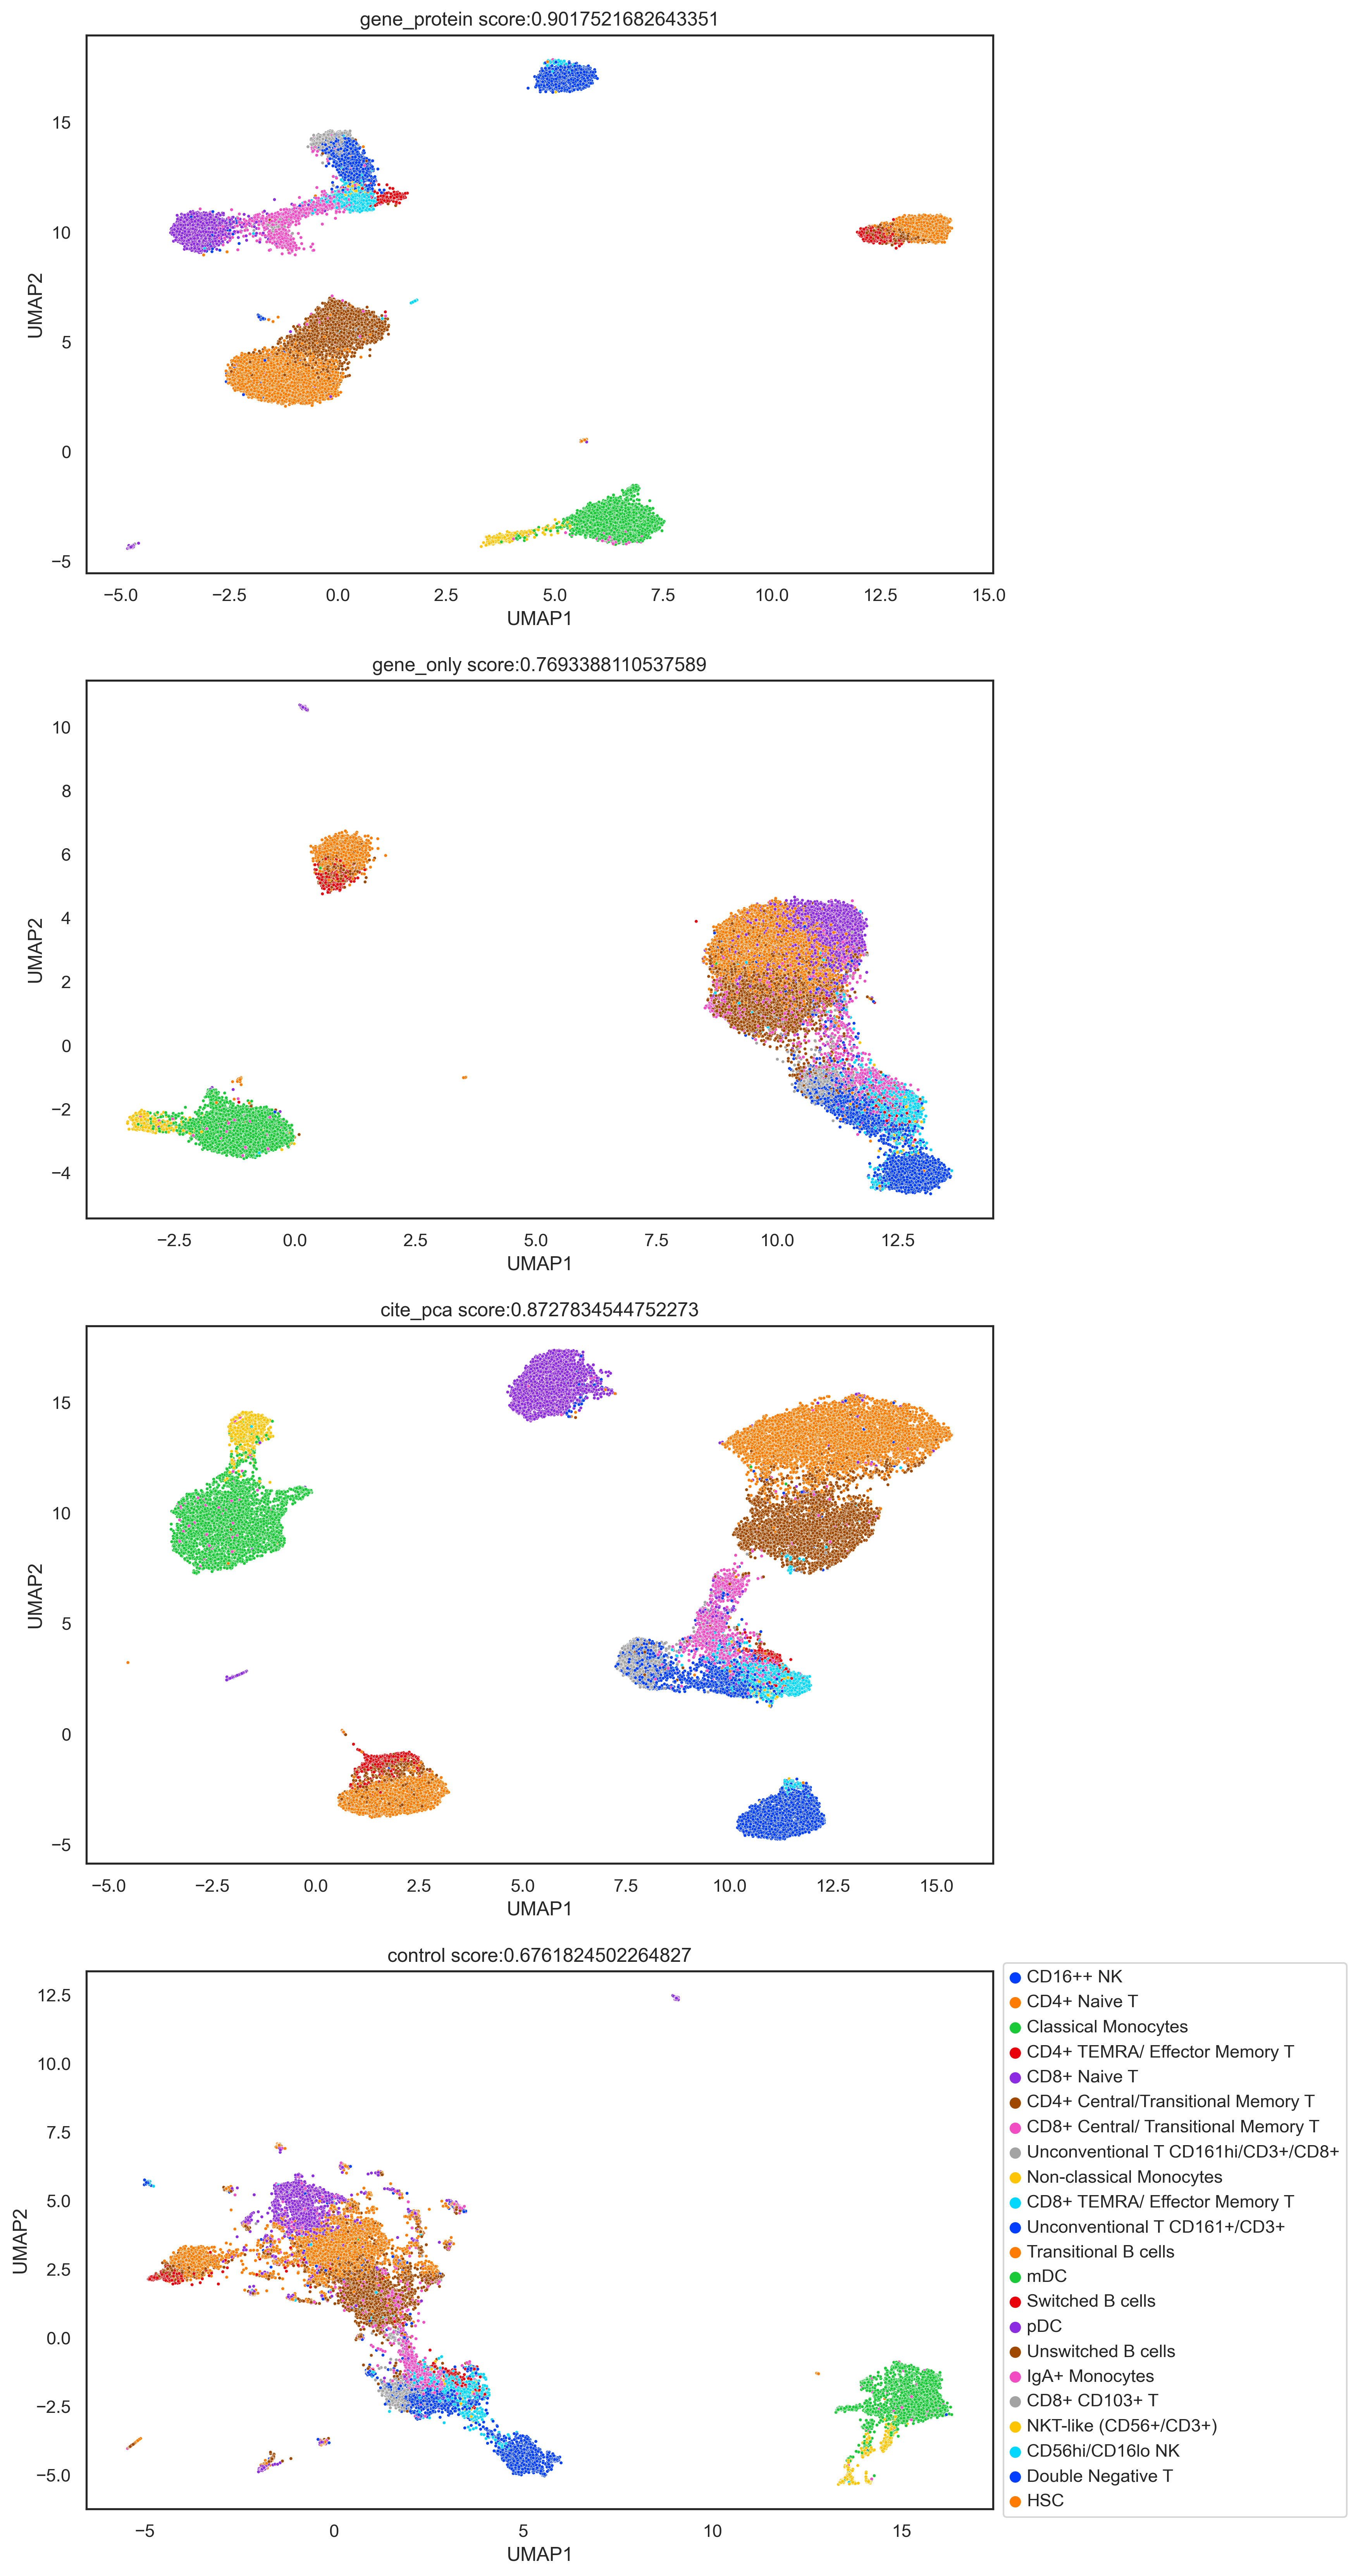

In [413]:
#### Plot All
plotObjs(KotliarovHigh_obj, metadata, 'celltype',legendAnchor=(1.40, 0.5))